In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [37]:
df = pd.read_csv("survey.csv")

In [38]:
df['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [4]:
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


only three columns contain null values
  state                      744 non-null    object
  self_employed              1241 non-null   object
  work_interfere             995 non-null    object

In [5]:
df = df.drop(columns=['comments','Timestamp'])

In [6]:
df.describe


<bound method NDFrame.describe of       Age  Gender         Country state self_employed family_history  \
0      37  Female   United States    IL           NaN             No   
1      44       M   United States    IN           NaN             No   
2      32    Male          Canada   NaN           NaN             No   
3      31    Male  United Kingdom   NaN           NaN            Yes   
4      31    Male   United States    TX           NaN             No   
...   ...     ...             ...   ...           ...            ...   
1254   26    male  United Kingdom   NaN            No             No   
1255   32    Male   United States    IL            No            Yes   
1256   34    male   United States    CA            No            Yes   
1257   46       f   United States    NC            No             No   
1258   25    Male   United States    IL            No            Yes   

     treatment work_interfere    no_employees remote_work  ...   anonymity  \
0          Yes         

In [7]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [8]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [9]:
name_of_features = df.columns.to_list()

In [10]:
for feature in name_of_features:
    print(f'\n{feature}\n')
    print(df[feature].unique())
    print('\n')


Age

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]



Gender

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leanin

every column is fine except age (negative age, and the sage over 1000 years) ,
gender


In [11]:
for feature in name_of_features:
    print(f'\n{feature}\n')
    print(df[feature].value_counts())
    print('\n')


Age

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 7

In [12]:
df = df[df['Age']>=18]
df = df[df['Age']<=100]
df['Age'].value_counts()

Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: count, dtype: int64

In [13]:
df_encoded = pd.DataFrame()
encoder = LabelEncoder()
for feature in name_of_features:
    df_encoded[feature] = encoder.fit_transform(df[feature])

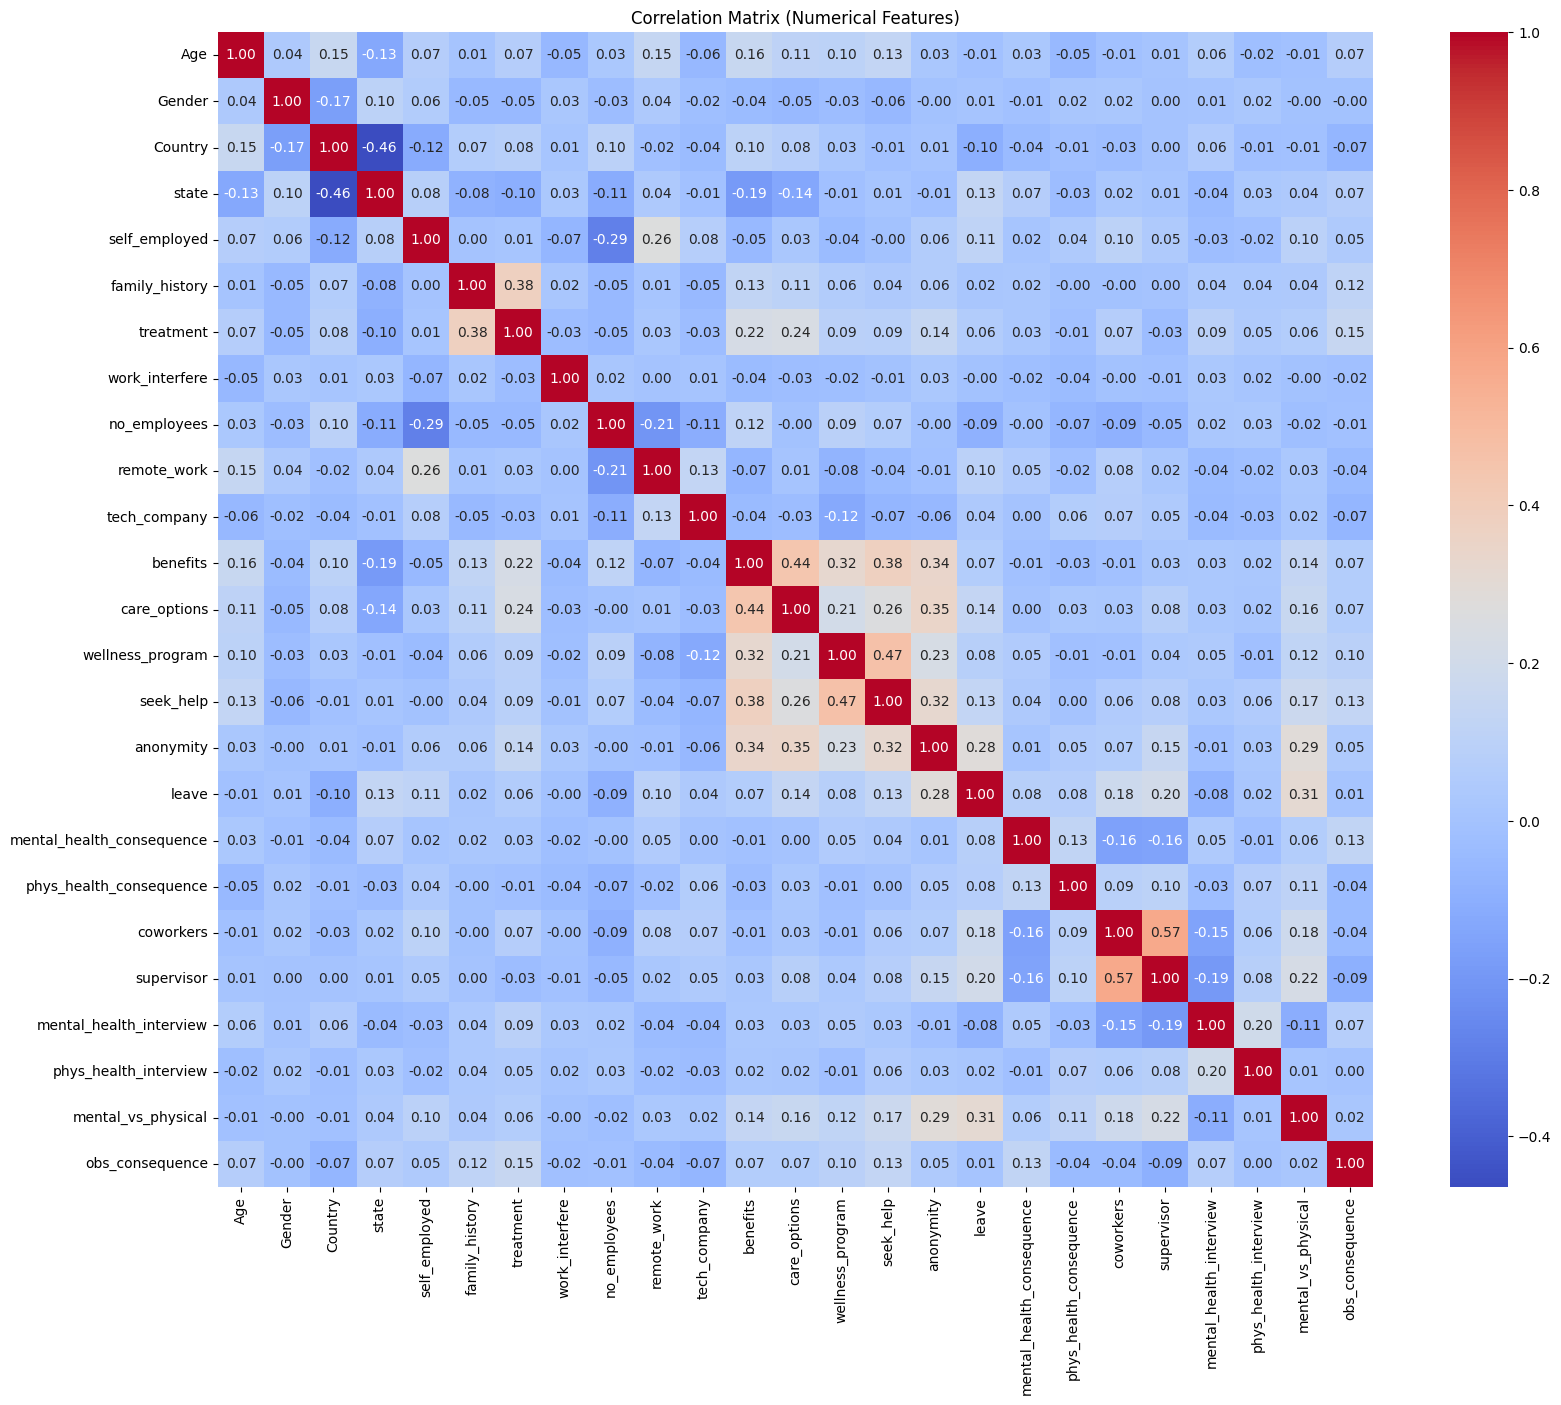

In [14]:
corr = df_encoded.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [15]:
def gender(element):
    if element[0]=='M':
        return 'male'
    elif element[0]=='m':
        return 'male'
    elif element[0]=='w':
        return 'female'
    elif element[0]=='W':
        return 'female'
    elif element[0]=='f':
        return 'female'
    elif element[0]=='F':
        return 'female'
    else:
        return 'others'
    
df['gender'] = df['Gender'].map(gender)
df['gender'].value_counts()
    

gender
male      983
female    248
others     20
Name: count, dtype: int64

In [16]:
df.drop(columns=['Gender','state'],inplace=True)

In [17]:
df['self_employed']=df['self_employed'].fillna(value='not sure')
df['work_interfere']=df['work_interfere'].fillna(value='dont know')
print(df.shape)
df.dropna(inplace=True)
print(df.shape)
bool(df.isna)

(1251, 24)
(1251, 24)


True

In [18]:
rfe=RFE(LogisticRegression(max_iter=6000),n_features_to_select=10)

In [19]:
name_of_features = df.columns.to_list()
name_of_features

['Age',
 'Country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'gender']

In [20]:
x = df_encoded.drop(columns=['Age'])
y=df_encoded['Age']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [22]:
rfe.fit_transform(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 6000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=6000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 6000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=6000).
You might also want to scale the data as shown in:

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]], shape=(1000, 10))

In [23]:
imp_col = x_train.columns[rfe.support_]
imp_col


Index(['self_employed', 'family_history', 'remote_work', 'tech_company',
       'benefits', 'wellness_program', 'seek_help', 'phys_health_consequence',
       'mental_health_interview', 'obs_consequence'],
      dtype='object')

In [24]:
name_of_features

['Age',
 'Country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'gender']

In [25]:
features_to_use = ['self_employed', 'treatment', 'remote_work', 'tech_company',
       'wellness_program', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'obs_consequence','mental_health_consequence']

In [26]:
df2 =pd.DataFrame()
for feature in features_to_use:
    df2[feature] = df_encoded[feature]

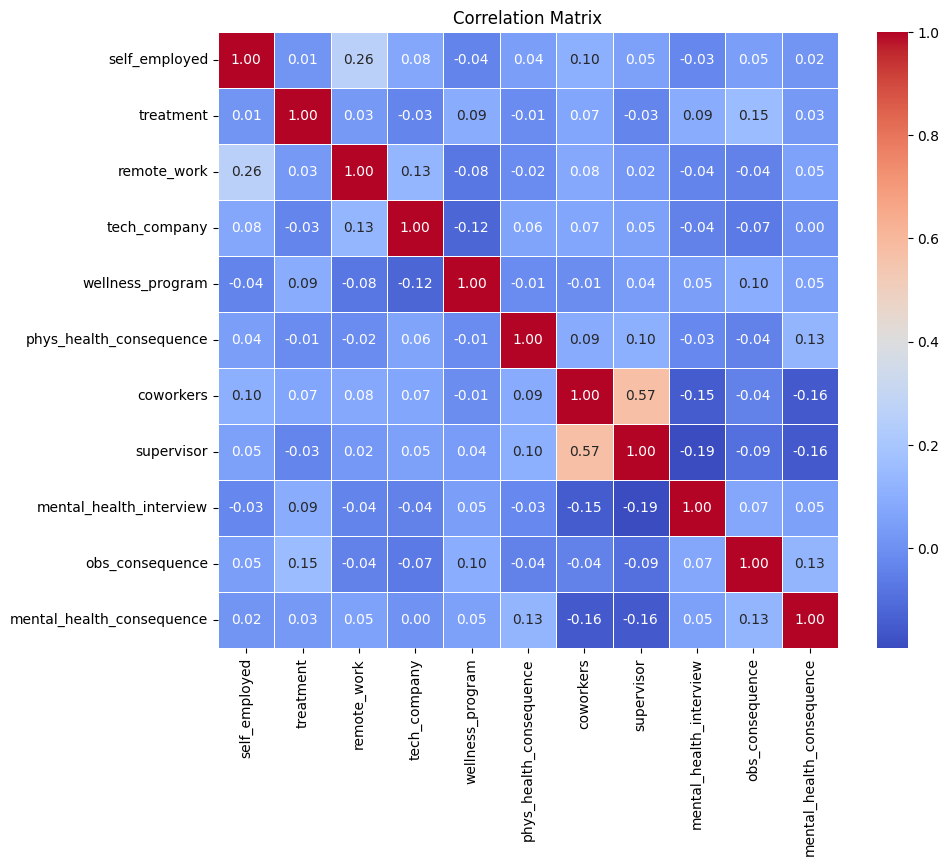

In [27]:
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [28]:
for feature in features_to_use:
    print(df.groupby(feature)['mental_health_consequence'].value_counts())

self_employed  mental_health_consequence
No             Maybe                        428
               No                           405
               Yes                          258
Yes            No                            71
               Maybe                         43
               Yes                           28
not sure       No                            11
               Maybe                          5
               Yes                            2
Name: count, dtype: int64
treatment  mental_health_consequence
No         No                           277
           Maybe                        224
           Yes                          118
Yes        Maybe                        252
           No                           210
           Yes                          170
Name: count, dtype: int64
remote_work  mental_health_consequence
No           Maybe                        352
             No                           332
             Yes                          1

In [29]:
print(df.groupby('remote_work')['mental_health_consequence'].value_counts())

remote_work  mental_health_consequence
No           Maybe                        352
             No                           332
             Yes                          196
Yes          No                           155
             Maybe                        124
             Yes                           92
Name: count, dtype: int64


In [30]:
df

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender
0,37,United States,not sure,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,female
1,44,United States,not sure,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,male
2,32,Canada,not sure,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,male
3,31,United Kingdom,not sure,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,male
4,31,United States,not sure,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,United Kingdom,No,No,Yes,dont know,26-100,No,Yes,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,male
1255,32,United States,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,male
1256,34,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,male
1257,46,United States,No,No,No,dont know,100-500,Yes,Yes,No,...,Don't know,Yes,No,No,No,No,No,No,No,female


In [31]:
df.to_csv('cleaned_survey.csv',index = False)